In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50 
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import random
#import cv2
import os

In [2]:
covid_dir=os.path.join("Database/COVID19")
norm_dir=os.path.join("Database/NORMAL")
pneu_dir=os.path.join("Database/Viral_Pneumonia")


print('total Covid images:', len(os.listdir(covid_dir)))
print('total Normal images:', len(os.listdir(norm_dir)))
print('total Viral_Pneumonia:', len(os.listdir(pneu_dir)))

total Covid images: 1327
total Normal images: 1341
total Viral_Pneumonia: 1463


In [3]:
img_width, img_height=(224,224)
batch_size=128

data_dir = "Database/"

# Rescale images 
datagen= ImageDataGenerator(rescale=1/255,validation_split=.3,rotation_range=20,
                           shear_range=.2,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,
                           preprocessing_function=preprocess_input)

# Flow training images in batches of 128 using train_data 
train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= ["COVID19", "NORMAL","Viral_Pneumonia"],
                shuffle=True, seed=30)


datagen2=ImageDataGenerator(rescale=1/255,validation_split=.3,
                           preprocessing_function=preprocess_input)

test_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= ["COVID19", "NORMAL","Viral_Pneumonia"],
                class_mode="categorical", subset="validation", shuffle=True, seed=30)

Found 2893 images belonging to 3 classes.
Found 1238 images belonging to 3 classes.


## Transfer Learning Model- Resnet

In [4]:
classifier = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# x=classifier.output
# x=AveragePooling2D()(x)
# x=Dense(64, activation="relu")(x)
# predictions=Dense(3, activation="softmax")(x)
# model=Model(inputs=classifier.input,outputs=predictions)

x=Flatten()(classifier.output)
x=Dense(3, activation="softmax")(x)
model=Model(inputs=classifier.input,outputs=x)


for layer in classifier.layers:
    layer.trainable=False
    
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [5]:
total_sample= train_generator.n
batch_size=128


history= model.fit(train_generator,epochs=50, validation_data=test_generator)

Epoch 1/50
23/23 [==============================] - 204s 9s/step - loss: 4.5271 - accuracy: 0.3643 - val_loss: 1.3551 - val_accuracy: 0.3538
Epoch 2/50
23/23 [==============================] - 198s 9s/step - loss: 1.0541 - accuracy: 0.5116 - val_loss: 0.7564 - val_accuracy: 0.6712
Epoch 3/50
23/23 [==============================] - 201s 9s/step - loss: 0.7405 - accuracy: 0.6657 - val_loss: 0.5886 - val_accuracy: 0.7569
Epoch 4/50
23/23 [==============================] - 226s 10s/step - loss: 0.6866 - accuracy: 0.7110 - val_loss: 0.6149 - val_accuracy: 0.6979
Epoch 5/50
23/23 [==============================] - 212s 9s/step - loss: 0.6348 - accuracy: 0.7404 - val_loss: 0.5362 - val_accuracy: 0.8150
Epoch 6/50
23/23 [==============================] - 216s 9s/step - loss: 0.6316 - accuracy: 0.7363 - val_loss: 0.6424 - val_accuracy: 0.6922
Epoch 7/50
23/23 [==============================] - 211s 9s/step - loss: 0.6192 - accuracy: 0.7425 - val_loss: 0.4314 - val_accuracy: 0.8473
Epoch 8/50
2

In [11]:
# Save Model
# history.save("ResNet_model.h5")

AttributeError: 'History' object has no attribute 'save'

In [10]:
test_loss, test_acc= model.evaluate(test_generator)
print("\n Test Accuracy:", test_acc)

10/10 [==============================] - 50s 5s/step - loss: 0.3987 - accuracy: 0.8554

 Test Accuracy: 0.855411946773529


## Transfer Learning Model- Resnet
### At 100 epochs 


In [3]:
img_width, img_height=(224,224)
batch_size=128

data_dir = "Database/"

# Rescale images 
datagen= ImageDataGenerator(rescale=1/255,validation_split=.3,rotation_range=20,
                           shear_range=.2,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,
                           preprocessing_function=preprocess_input)

# Flow training images in batches of 128 using train_data 
train_generator= datagen.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                subset="training",
                class_mode="categorical", 
                classes= ["COVID19", "NORMAL","Viral_Pneumonia"],
                shuffle=True, seed=30)


datagen2=ImageDataGenerator(rescale=1/255,validation_split=.3,
                           preprocessing_function=preprocess_input)

test_generator=datagen2.flow_from_directory(
                data_dir,
                target_size=(img_width,img_height),
                batch_size=batch_size,
                classes= ["COVID19", "NORMAL","Viral_Pneumonia"],
                class_mode="categorical", subset="validation", shuffle=True, seed=30)

Found 2893 images belonging to 3 classes.
Found 1238 images belonging to 3 classes.


In [4]:
classifier = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# x=classifier.output
# x=AveragePooling2D()(x)
# x=Dense(64, activation="relu")(x)
# predictions=Dense(3, activation="softmax")(x)
# model=Model(inputs=classifier.input,outputs=predictions)

x=Flatten()(classifier.output)
x=Dense(3, activation="softmax")(x)
model=Model(inputs=classifier.input,outputs=x)


for layer in classifier.layers:
    layer.trainable=False
    
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [5]:
total_sample= train_generator.n
batch_size=128


history= model.fit(train_generator,epochs=100, validation_data=test_generator)

Epoch 1/100
23/23 [==============================] - 267s 12s/step - loss: 4.6635 - accuracy: 0.3443 - val_loss: 1.1251 - val_accuracy: 0.5872
Epoch 2/100
23/23 [==============================] - 184s 8s/step - loss: 1.2833 - accuracy: 0.4957 - val_loss: 1.0477 - val_accuracy: 0.5307
Epoch 3/100
23/23 [==============================] - 184s 8s/step - loss: 0.7644 - accuracy: 0.6664 - val_loss: 0.5884 - val_accuracy: 0.7787
Epoch 4/100
23/23 [==============================] - 187s 8s/step - loss: 0.6952 - accuracy: 0.7055 - val_loss: 0.5474 - val_accuracy: 0.7884
Epoch 5/100
23/23 [==============================] - 185s 8s/step - loss: 0.7026 - accuracy: 0.6758 - val_loss: 0.6911 - val_accuracy: 0.6704
Epoch 6/100
23/23 [==============================] - 186s 8s/step - loss: 0.6199 - accuracy: 0.7338 - val_loss: 0.4959 - val_accuracy: 0.8255
Epoch 7/100
23/23 [==============================] - 186s 8s/step - loss: 0.5828 - accuracy: 0.7750 - val_loss: 0.5519 - val_accuracy: 0.7690
Epoch

23/23 [==============================] - 187s 8s/step - loss: 0.3413 - accuracy: 0.8676 - val_loss: 0.3770 - val_accuracy: 0.8603
Epoch 59/100
23/23 [==============================] - 187s 8s/step - loss: 0.3576 - accuracy: 0.8614 - val_loss: 0.3797 - val_accuracy: 0.8562
Epoch 60/100
23/23 [==============================] - 187s 8s/step - loss: 0.3367 - accuracy: 0.8728 - val_loss: 0.2865 - val_accuracy: 0.8918
Epoch 61/100
23/23 [==============================] - 187s 8s/step - loss: 0.3711 - accuracy: 0.8524 - val_loss: 0.4902 - val_accuracy: 0.8069
Epoch 62/100
23/23 [==============================] - 187s 8s/step - loss: 0.3283 - accuracy: 0.8787 - val_loss: 0.3185 - val_accuracy: 0.8918
Epoch 63/100
23/23 [==============================] - 187s 8s/step - loss: 0.3519 - accuracy: 0.8604 - val_loss: 0.5491 - val_accuracy: 0.8102
Epoch 64/100
23/23 [==============================] - 187s 8s/step - loss: 0.3828 - accuracy: 0.8576 - val_loss: 0.5560 - val_accuracy: 0.8102
Epoch 65/100

In [10]:
# Save Model
model.save("ResNet_model.h5")

In [8]:
train_loss, train_acc= model.evaluate(train_generator)
print("\n Train Accuracy:", train_acc)
print("\n Train Loss:", train_loss)

23/23 [==============================] - 138s 6s/step - loss: 0.3031 - accuracy: 0.8925

 Train Accuracy: 0.8924991488456726

 Train Loss: 0.30308762192726135


In [9]:
test_loss, test_acc= model.evaluate(test_generator)
print("\n Test Accuracy:", test_acc)
print("\n Test Loss:", test_loss)

10/10 [==============================] - 49s 5s/step - loss: 0.3371 - accuracy: 0.8740

 Test Accuracy: 0.8739902973175049

 Test Loss: 0.3370720148086548


In [11]:
model.metrics_names

['loss', 'accuracy']

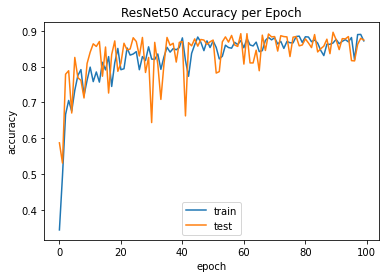

In [12]:
# PLOT ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower center')
plt.show()

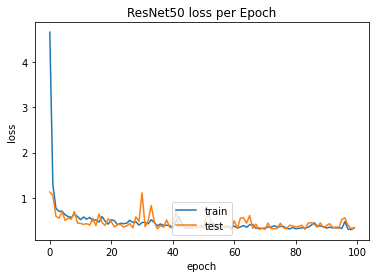

In [13]:
# PLOT LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 loss per Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower center')
plt.show()

In [15]:
# Save history of model into csv
hist_df5 = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'resnet_model.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df5.to_csv(f)